<a href="https://colab.research.google.com/github/anirudhawagh/HEALTH-INSURANCE-CROSS-SELL-PREDICTION-by-Aniruddha-wagh/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Aniruddha Narayan Wagh


# **Project Summary -**

In this project, our goal was to assist an insurance company in predicting whether their past policyholders would be interested in purchasing vehicle insurance. By understanding customer behavior, the company could refine their strategies and optimize revenue generation. The dataset included 381,109 rows and 12 features, with the categorical variable "Response" indicating customer interest in vehicle insurance.

We began by checking for null and duplicate values, finding none and thus avoiding the need for data cleaning. Next, we normalized the numerical columns to ensure consistency.

In the exploratory data analysis, we categorized age into three groups (YoungAge, MiddleAge, and OldAge) to gain insights into age-related preferences. We also categorized Region_Code and Policy_Sales_Channel to extract valuable information. Through plots, we explored independent features and their relationship with the target variable.

For feature selection, we employed Kendall's rank correlation coefficient for numerical features and the Mutual Information technique for categorical features. These methods helped identify the most relevant features associated with the target variable.

To predict customer interest, we implemented various supervised machine learning algorithms, including Decision Tree Classifier, AdaBoost, LightGBM, BaggingRegressor, NaiveBayes, and Logistic Regression. Hyperparameter tuning was applied to optimize model performance and prevent overfitting.



# **GitHub Link -**

 GitHub Link -https://github.com/anirudhawagh/HEALTH-INSURANCE-CROSS-SELL-PREDICTION-by-Aniruddha-wagh

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset link = https://drive.google.com/file/d/1AW5Gz6IqktDOoIjaBeWvy-HMaF5Y84sX/view

### Dataset Loading

In [3]:
# Load Dataset
database ="/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
data_df =pd.read_csv(database)

### Dataset First View

In [4]:
# Dataset First Look
data_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Index:", data_df.index)
print('\n')
print("Columns:", data_df.columns)
print('\n')
print("Number of rows:", len(data_df))

Index: RangeIndex(start=0, stop=381109, step=1)


Columns: Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


Number of rows: 381109


### Dataset Information

In [6]:
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

duplicate_count = data_df.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# Visualizing the missing values
miss_values =data_df.isnull().sum().sort_values(ascending=False)
miss_values # We have check the count of null value in individual columns

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

Dataset Size: The dataset consists of 381,109 rows and 12 columns.Column Information: The dataset contains columns with the following names: 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', and 'Response'. Each column represents a different feature or attribute of the data.Data Characteristics: The dataset contains various types of information such as demographic details (gender, age), driving-related information (driving license, region code), insurance-related details (previously insured, vehicle age, vehicle damage), policy information (annual premium, policy sales channel), and historical information (vintage). The 'Response' column likely indicates the target variable or the outcome of interest.Data Quality: The dataset does not have any duplicate values or missing/null values, as indicated by the counts of duplicates and missing values being zero.

## ***2. Understanding Your Variables***






In [10]:
# Dataset Columns
columns = data_df.columns.tolist()

print("Dataset Columns:")
for column in columns:
    print(column)

Dataset Columns:
id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response


In [11]:
# Dataset Describe
data_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

Health Insurance Dataset
Columns:
ID: Unique identifier for the Customer.

Age: Age of the Customer.

Gender: Gender of the Customer.

Driving_License: 0 for customer not having DL, 1 for customer having DL.

Region_Code: Unique code for the region of the customer.

Previously_Insured: 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

Vehicle_Age: Age of the vehicle.

Vehicle_Damage: Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year.

Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company.

Response (Dependent Feature): 1 for Customer is interested, 0 for Customer is not interested.

### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [13]:
# Create a new column 'Renewed_Insurance' to indicate whether a customer renewed insurance or not
data_df['Renewed_Insurance'] = data_df['Response'].map({1: 'Yes', 0: 'No'})

# Create custom age bins
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = [f'{age}-{age+4}' for age in age_bins[:-1]]
data_df['Age_Group'] = pd.cut(data_df['Age'], bins=age_bins, right=False, labels=age_labels)



# Display the updated DataFrame with the new columns
print(data_df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [14]:
print(data_df['Age_Group'].unique())
print(data_df['Renewed_Insurance'].unique())

['40-44', '75-79', '45-49', '20-24', '25-29', ..., '60-64', '65-69', '50-54', '80-84', '85-89']
Length: 14
Categories (16, object): ['20-24' < '25-29' < '30-34' < '35-39' ... '80-84' < '85-89' < '90-94' < '95-99']
['Yes' 'No']


In [15]:
import pandas as pd

# Assume your DataFrame is named data_df

# Define the age categories
def categorize_age(age):
    if age < 35:
        return 'Young'
    elif age >= 35 and age <= 64:
        return 'Middle Age'
    else:
        return 'Senior'

# Create the new column 'Age_Category'
data_df['Age_Category'] = data_df['Age'].apply(categorize_age)

# Display the updated DataFrame
print(data_df)


            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [16]:
import pandas as pd

# List of region codes
region_codes = [28, 3, 11, 41, 33, 6, 35, 50, 15, 45, 8, 36, 30, 26, 16, 47, 48, 19, 39, 23, 37, 5, 17, 2, 7, 29, 46, 27, 25, 13, 18, 20, 49, 22, 44, 0, 9, 31, 12, 34, 21, 10, 14, 38, 24, 40, 43, 32, 4, 51, 42, 1, 52]

# Divide the region codes into 4 sets
num_sets = 4
sets_of_region_codes = [region_codes[i:i+13] for i in range(0, len(region_codes), 13)]

# Create a mapping of region codes to region names
region_mapping = {
    'North': sets_of_region_codes[0],
    'South': sets_of_region_codes[1],
    'East': sets_of_region_codes[2],
    'West': sets_of_region_codes[3]
}

# Create a new column 'Region' in the dataset based on the region codes
data_df['Region'] = data_df['Region_Code'].apply(lambda x: next((region_name for region_name, region_codes in region_mapping.items() if x in region_codes), 'Unknown'))

# Display the updated DataFrame with the new 'Region' column
print(data_df)


            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [17]:
# Dataset Columns
columns = data_df.columns.tolist()

print("Dataset Columns:")
for column in columns:
    print(column)

Dataset Columns:
id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response
Renewed_Insurance
Age_Group
Age_Category
Region


In [18]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Renewed_Insurance,Age_Group,Age_Category,Region
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Yes,40-44,Middle Age,North
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,No,75-79,Senior,North
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Yes,45-49,Middle Age,North
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,No,20-24,Young,North
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,No,25-29,Young,North


### What all manipulations have you done and insights you found?

  Answer Here

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

italicized text#### Chart - 1

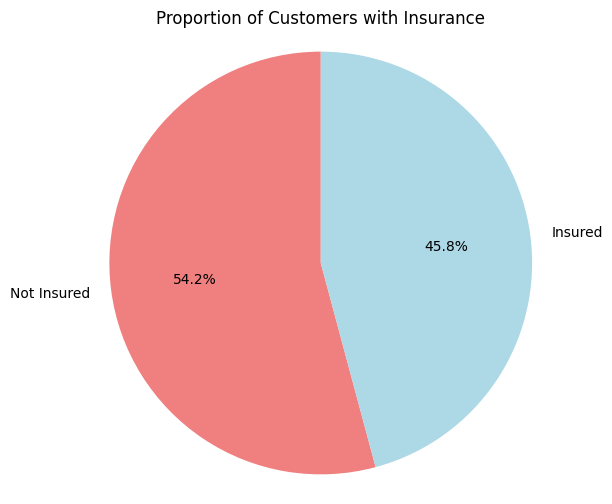

In [19]:
# Chart - 1 visualization code
# Calculate the counts of customers with and without insurance
insurance_counts = data_df['Previously_Insured'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(insurance_counts, labels=['Not Insured', 'Insured'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Proportion of Customers with Insurance')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

##### 1. Why did you pick the specific chart?

  Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

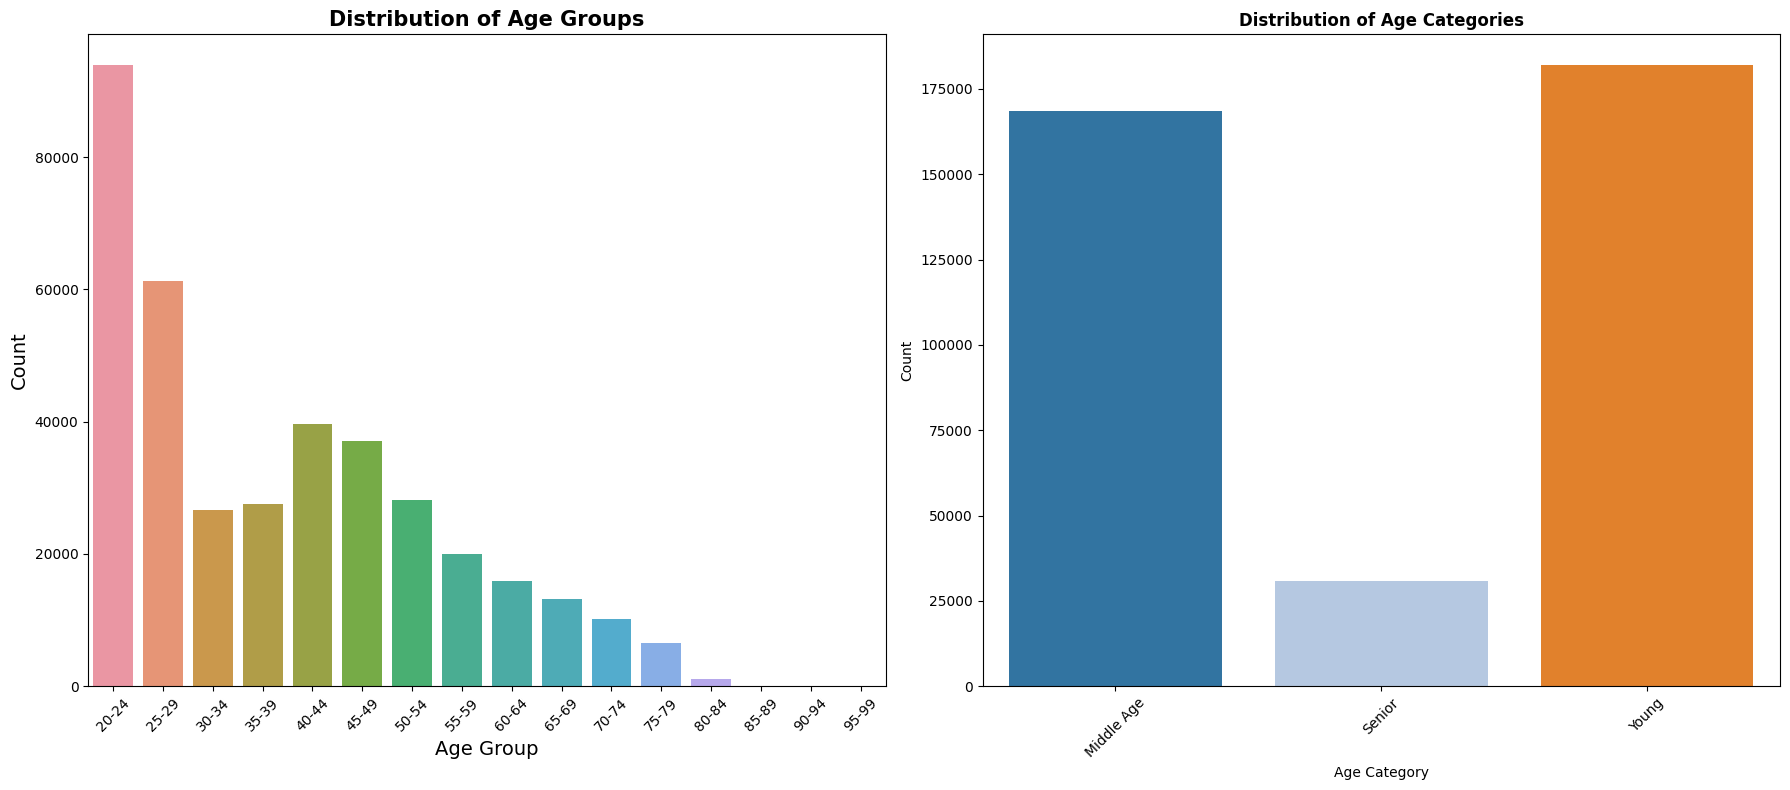

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into data_df

# Create custom age bins
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = [f'{age}-{age+4}' for age in age_bins[:-1]]
data_df['Age_Group'] = pd.cut(data_df['Age'], bins=age_bins, right=False, labels=age_labels)

# Create a figure with two subplots
plt.figure(figsize=(18, 8))

# Subplot 1: Distribution of Age Groups
plt.subplot(1, 2, 1)
sns.countplot(x='Age_Group', data=data_df)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age Groups', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

# Subplot 2: Distribution of Age Categories
plt.subplot(1, 2, 2)
sns.countplot(x='Age_Category', data=data_df, palette='tab20')
plt.xlabel('Age Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Age Categories', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Figure size 1800x800 with 0 Axes>

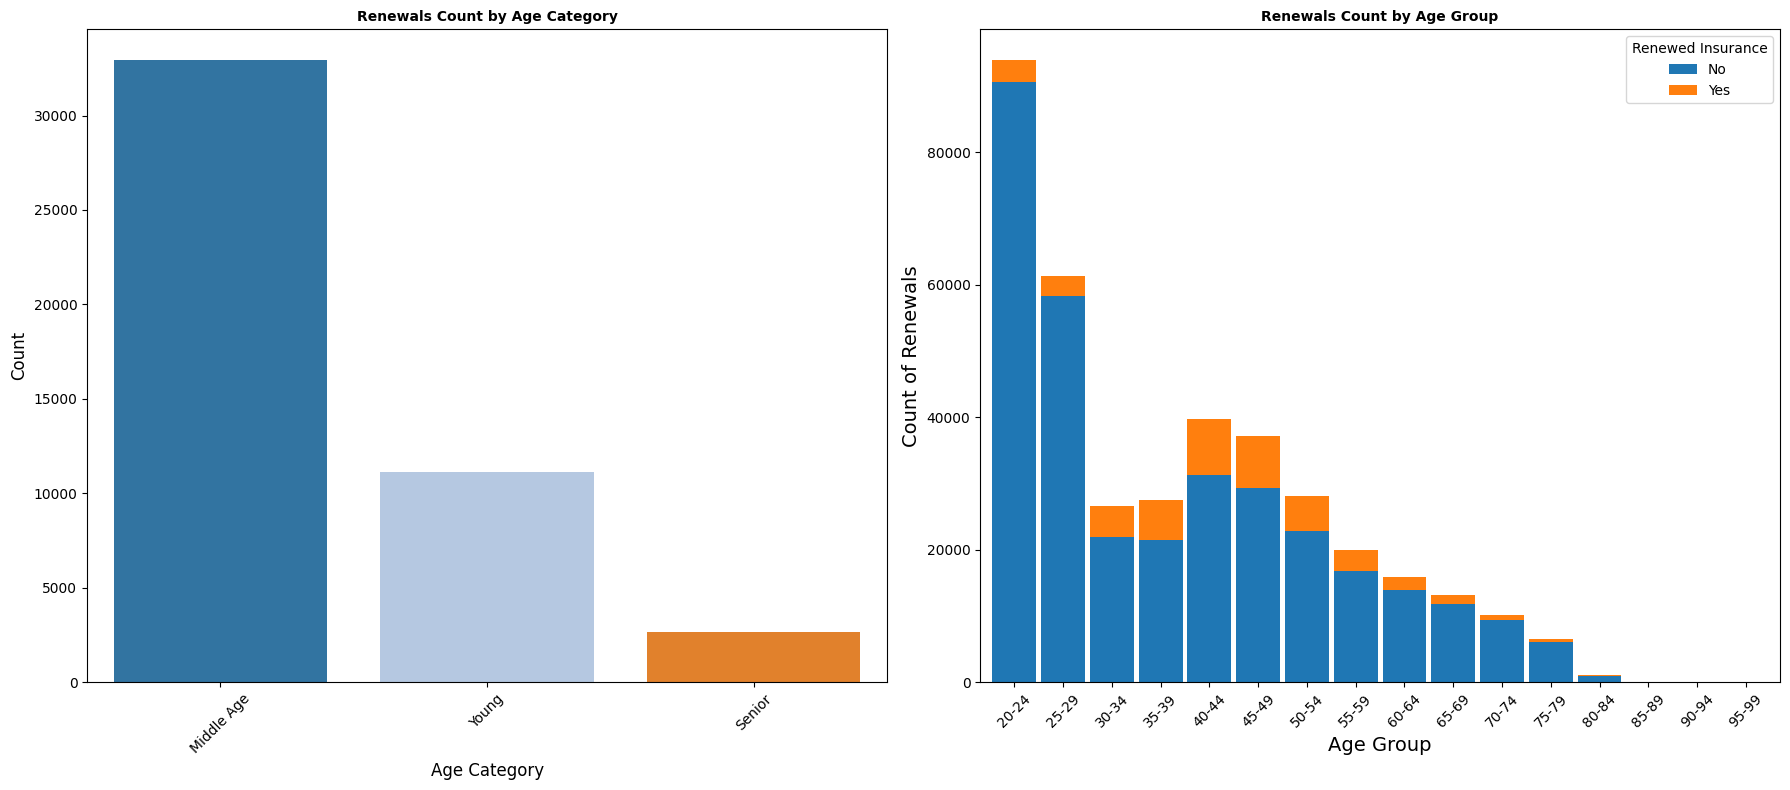

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))  # Adjust the figure size as needed

# Create a figure with a single row and two columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Set the same figure size for both subplots

# Filter data for renewals (Response: 'Yes')
renewals_data = data_df[data_df['Response'] == 1]

# Subplot 1: Count of Renewals by Age Category
sns.countplot(x='Age_Category', data=renewals_data, palette='tab20', ax=axes[0])
axes[0].set_xlabel('Age Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Renewals Count by Age Category', fontsize=10, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2: Count of Renewals by Age Group
filtered_data_df = data_df[data_df['Age_Group'] != 'Unknown']
filtered_data_df['Renewed_Insurance'] = filtered_data_df['Renewed_Insurance'].astype('category').cat.set_categories(['Yes', 'No'])
age_group_renewals = filtered_data_df.groupby('Age_Group')['Renewed_Insurance'].value_counts().unstack(fill_value=0)
age_group_renewals[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[1], width=0.9)  # Adjust width of bars
axes[1].set_xlabel('Age Group', fontsize=14)
axes[1].set_ylabel('Count of Renewals', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Renewed Insurance', loc='upper right', labels=['No', 'Yes'])

# Set the titles separately and adjust the layout
axes[1].set_title('Renewals Count by Age Group', fontsize=10, fontweight='bold')

# Adjust the layout of the figure to ensure everything fits properly
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here  

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

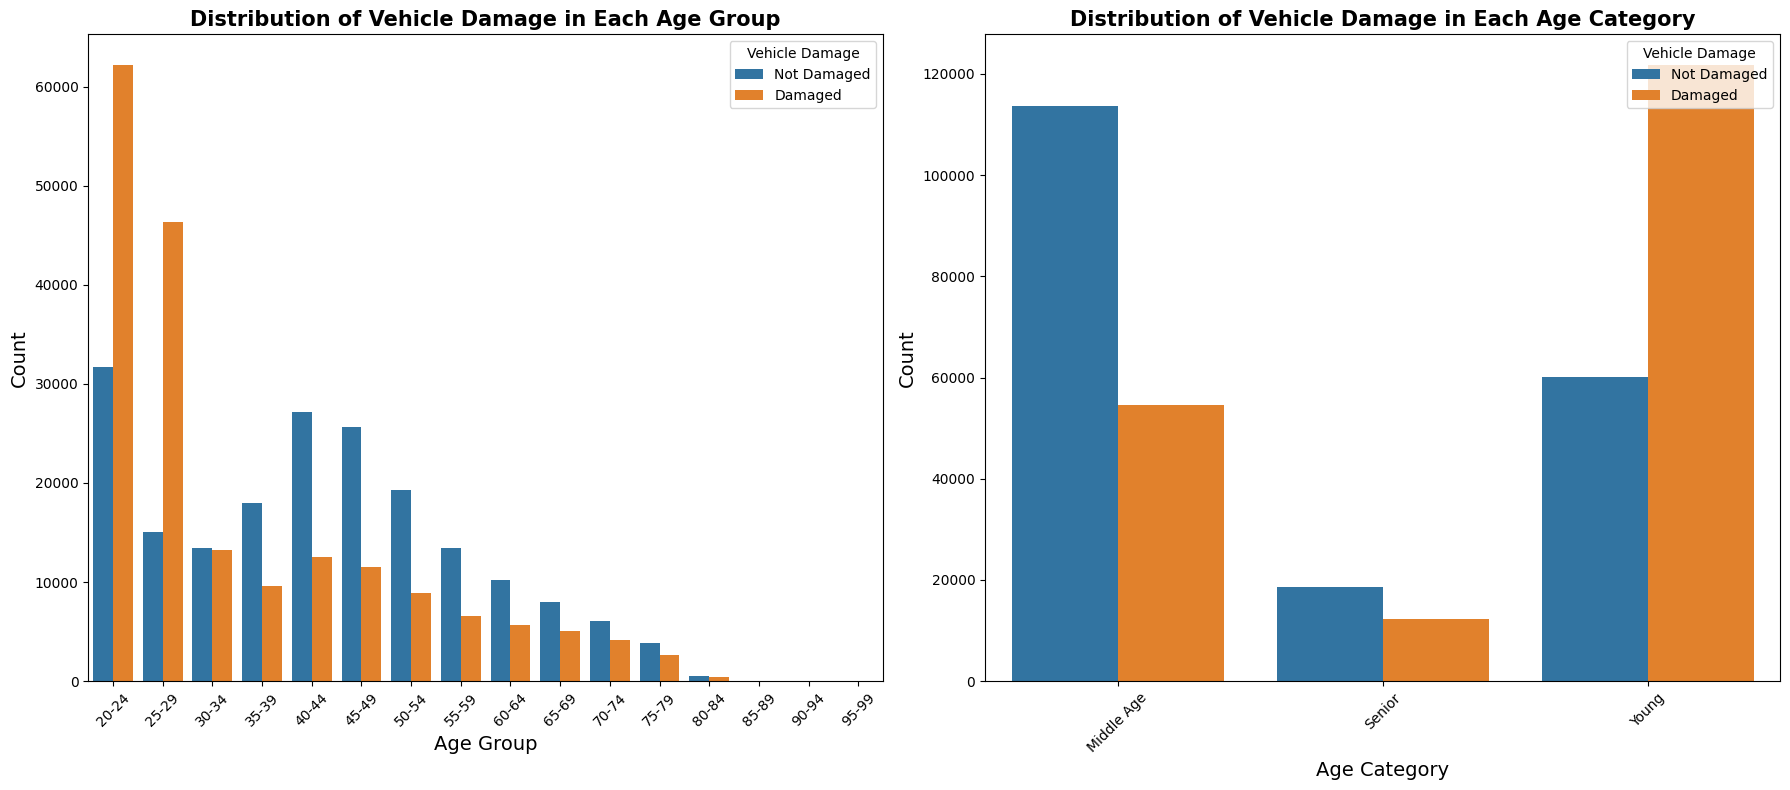

In [22]:
  # Chart - 4 visualization code
  # Plot the data
  plt.figure(figsize=(18, 8))  # Adjust the figure size as needed

  # Subplot 1: Distribution of Vehicle Damage in Each Age Group
  plt.subplot(1, 2, 1)
  sns.countplot(x='Age_Group', hue='Vehicle_Damage', data=data_df)
  plt.xlabel('Age Group', fontsize=14)
  plt.ylabel('Count', fontsize=14)
  plt.title('Distribution of Vehicle Damage in Each Age Group', fontsize=15, fontweight='bold')
  plt.xticks(rotation=45)
  plt.legend(title='Vehicle Damage', labels=['Not Damaged', 'Damaged'], loc='upper right')

  # Subplot 2: Distribution of Vehicle Damage in Each Age Category
  plt.subplot(1, 2, 2)
  sns.countplot(x='Age_Category', hue='Vehicle_Damage', data=data_df)
  plt.xlabel('Age Category', fontsize=14)
  plt.ylabel('Count', fontsize=14)
  plt.title('Distribution of Vehicle Damage in Each Age Category', fontsize=15, fontweight='bold')
  plt.xticks(rotation=45)
  plt.legend(title='Vehicle Damage', labels=['Not Damaged', 'Damaged'], loc='upper right')

  # Adjust the layout of the subplots
  plt.tight_layout()

  plt.show()
